<a href="https://colab.research.google.com/github/artelias/olimpiadas-/blob/main/Trabalho_visualiza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabalho de visualização da informação**

# *Índice*

*   Descrição do conjunto de dados
*   Preparação de dados
*   Visualização de dados 
*   Questionamentos interresantes：
 
    1.   Qual país tem mais medalhistas de ouro?
    2.   Atletas femininas ganham mais medalhas do que seus pares masculinos?

    3.   Quantas medalhas foram conquistadas pelo Paquistão?

    4.   Qual é a idade média dos participantes de diferentes equipes com menos de 22 anos que participam das Olimpíadas.
    5.   Qual temporada tem o maior número de participantes entre verão e inverno? 

Descrição do conjunto de dados
O conjunto de dados registra as informações de atletas, eventos e resultados de 120 anos de história olímpica: de Atenas 1896 a Rio 2016. Veja: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes- e-resultados/home

<p>A razão pela qual escolhi esse conjunto de dados é porque a história das Olimpíadas tem muitas histórias para contar. Através da história das Olimpíadas, podemos espreitar algumas tendências históricas de toda a sociedade humana também.
<p>As colunas em que foquei são as "Sexo", "Peso", "Altura", "NOC", "Esporte", "Ano" e "Medalha". Vários gráficos são baseados nessas variáveis ​​e geram informações históricas interessantes.
<p>Os módulos python utilizados ou podem no projeto incluem: Numpy, Pandas, Seaborn, Plotly, Matplotlib, StatsModels, etc.
<p>O objetivo desta visualização do conjunto de dados é explorar que, durante a passagem do tempo, como o grau de participação dos Jogos Olímpicos mudou (tanto na tendência do número total de atletas participantes quanto na tendência das mudanças no número de atletas por país). Também há resultados de medalhas plotados para mostrar quais países são fortes em ganhar medalhas.

Importando pacotes que vão ser utilizados 

In [18]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Importando o arquivo para o colab


In [3]:
from google.colab import files 
  
uploaded = files.upload()

Saving athlete_events.csv to athlete_events.csv


In [23]:
from google.colab import files 
  
uploaded = files.upload()

Saving noc_regions.csv to noc_regions.csv


In [35]:
dados = pd.read_csv('athlete_events.csv')
dados.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Grafico de Barras

In [36]:
data_noc = pd.read_csv('noc_regions.csv', index_col=0)
data_noc.head()


,region,notes
NOC,,
AFG,Afghanistan,NaN
AHO,Curacao,Netherlands Antilles
ALB,Albania,NaN
ALG,Algeria,NaN
AND,Andorra,NaN


In [7]:
masculino= dados.loc[dados['Sex']=='M']
alturaM = masculino['Height']
pesoM = masculino['Weight']

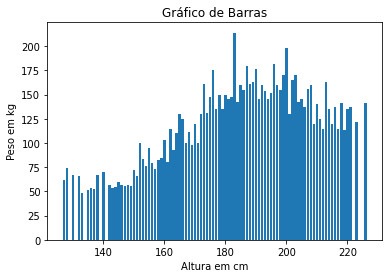

In [ ]:
plt.bar(alturaM, pesoM) # Gera o gráfico de linha com x,y
plt.xlabel('Altura em cm') # Configura o rótulo do eixo x
plt.ylabel('Peso em kg') # Configura o rótulo do eixo y
plt.title('Gráfico de Barras') # Título do gráfico
plt.show()

(array([0.00000e+00, 3.23030e+04, 1.77744e+05, 4.26840e+04, 6.69500e+03,
        1.55800e+03, 5.29000e+02, 1.18000e+02, 9.00000e+00, 2.00000e+00]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

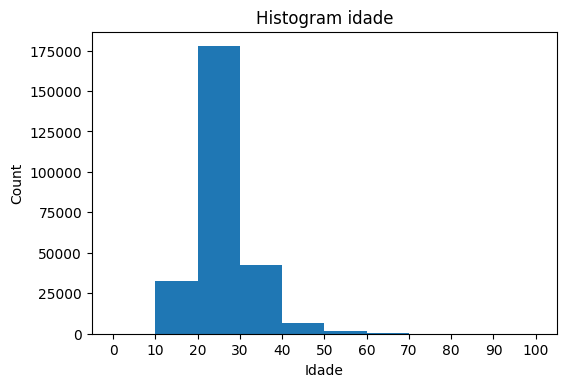

In [ ]:
#plotar um histograma de idade
bins = [0,10,20,30,40,50,60,70,80,90,100]#os intervalos (bins) do histograma
fig, axs_1 = plt.subplots(1,1,dpi=100)
axs_1.set_title('Histogram idade')
axs_1.set_xlabel('Idade')
axs_1.set_xticks(bins)
axs_1.set_ylabel('Count')
axs_1.hist(dados['Age'],width=10,bins=bins)

Como podemos notar pelo histograma mostrado acima a maior faixa de idades que aparece em todos os jogos olímpicos para todos os esportes é de 20 a 30 anos. Precisamos estudar e analisar a faixa que é menor que 20 e maior que 40 verifique se há outliers por esporte.

(array([8.0000e+00, 1.4700e+02, 1.3040e+03, 1.0701e+04, 4.7633e+04,
        7.4680e+04, 5.7494e+04, 1.6378e+04, 2.3230e+03, 2.6000e+02,
        1.7000e+01, 0.0000e+00]),
 array([120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]),
 <a list of 12 Patch objects>)

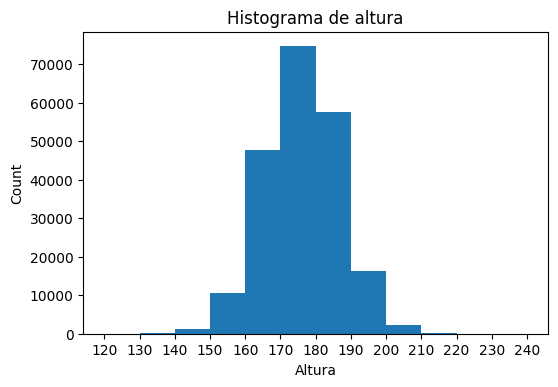

In [ ]:
#plotar um histograma de altura
bins = [120,130,140,150,160,170,180,190,200,210,220,230,240]#os intervalos (bins) do histograma
fig, axs_1 = plt.subplots(1,1,dpi=100)
axs_1.set_title('Histograma de altura')
axs_1.set_xlabel('Altura')
axs_1.set_xticks(bins)
# axs_3.set_xlim([35,90]) #zoom in, or show me a certain area on the graph 
axs_1.set_ylabel('Count')
axs_1.hist(dados['Height'],width=10,bins=bins)

Como podemos notar pelo histograma mostrado acima, a maior faixa de altura que aparece em todos os jogos olímpicos para todos os esportes é da faixa de 170 a 180. Precisamos estudar e analisar a faixa que é menor que 150 e maior que 200 para verificar outliers por esporte.

(array([2.0000e+01, 1.0230e+03, 7.5790e+03, 3.5972e+04, 5.7953e+04,
        5.4626e+04, 3.0878e+04, 1.3263e+04, 4.0780e+03, 1.3450e+03,
        8.7600e+02, 3.9200e+02, 1.4800e+02, 4.0000e+01, 3.2000e+01,
        1.0000e+01]),
 array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
        150, 160, 170, 180]),
 <a list of 16 Patch objects>)

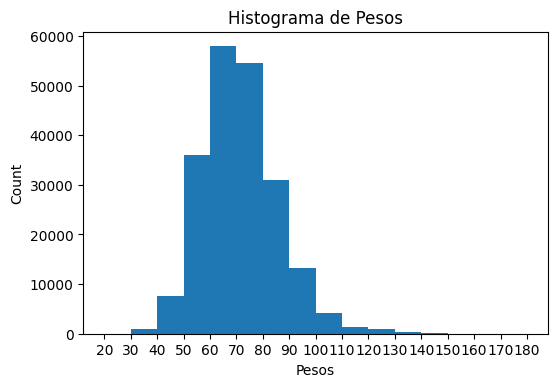

In [ ]:
#plotar um histograma de peso
bins = [20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180]#os intervalos (bins) do histograma
fig, axs_1 = plt.subplots(1,1,dpi=100)
axs_1.set_title('Histograma de Pesos')
axs_1.set_xlabel('Pesos')
axs_1.set_xticks(bins)
axs_1.set_ylabel('Count')
axs_1.hist(dados['Weight'],width=10,bins=bins)

Como podemos notar pelo histograma mostrado acima, a maior faixa de peso que aparece em todos os jogos olímpicos para todos os esportes é de 60 a 80. Precisamos estudar e analisar a faixa que é menor que 50 e maior que 110 para verificar outliers por esporte.

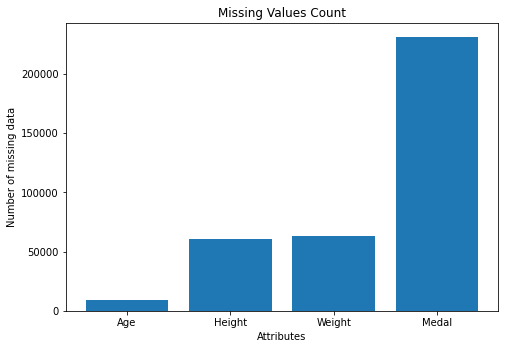

In [ ]:
# quantos dados ausentes temos usando o gráfico de barras?
x=dados.isna().sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Age', 'Height', 'Weight','Medal']
missing = [x[3],x[4],x[5],x[14]]

ax.bar(labels,missing)
ax.set_ylabel('Número de dados ausentes')
ax.set_title('Contagem de valores ausentes')
ax.set_xlabel('Atributos')
plt.show()

Como mostrado, a grande parte dos dados ausentes está nos atributos de altura e peso, mas a maior parte é Medalha. Medalha é a maior parte, pois os dados ausentes para esta grande parte do atributo medalha são porque pequena parte levará medalhas para cada jogo olímpico onde temos ouro, prata e bronze, o que é razoável, portanto, esse atributo (Medalha) não está definido em uma boa maneira no conjunto de dados, portanto, uma solução para isso seria a codificação de rótulos.


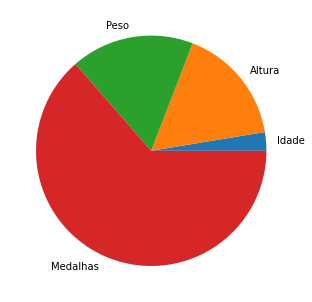

In [37]:
x=dados.isna().sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
missing = [x[3],x[4],x[5],x[14]]
ax.pie(missing,labels  = ['Idade', 'Altura', 'Peso','Medalhas'])
plt.show()

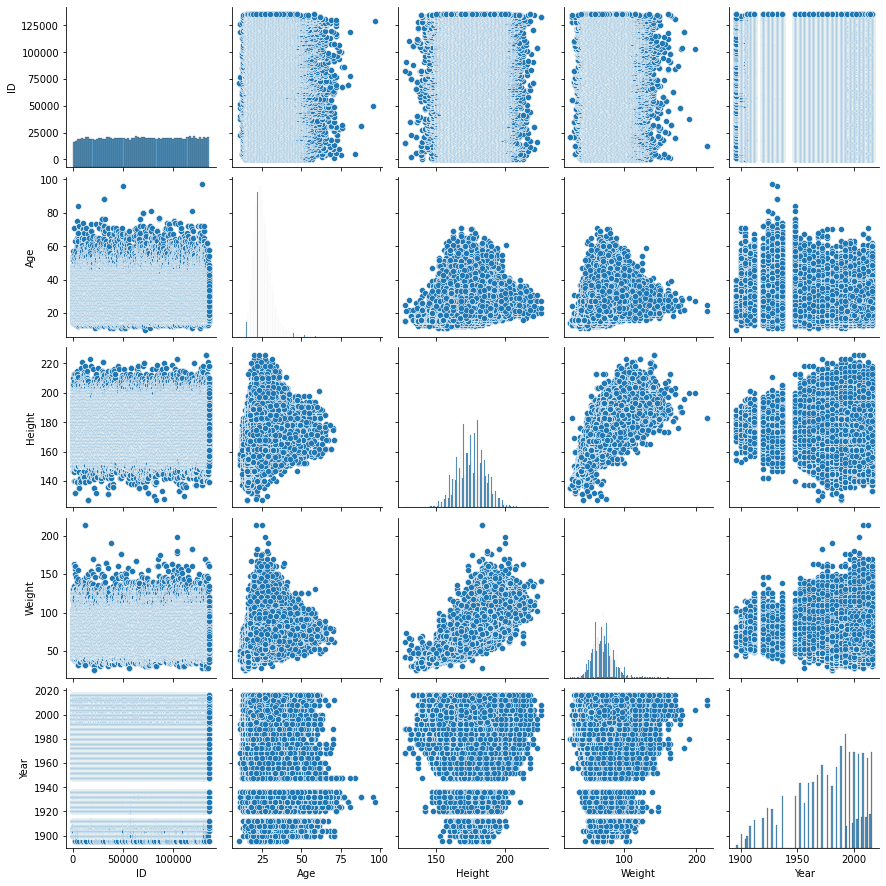

In [19]:
sns.pairplot(dados)
#a partir dos dados podemos notar que as correlações estão entre idade,peso e altura. Por exemplo, existe uma correlação positiva entre a altura e o peso
# uma vez que o peso aumenta a altura aumenta.

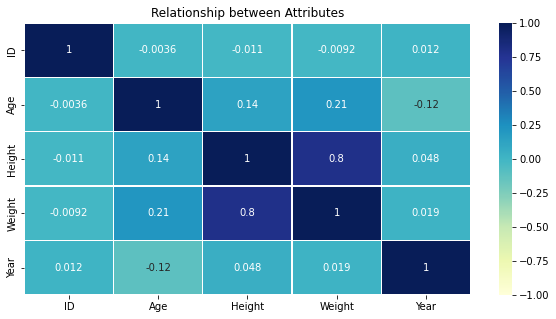

In [20]:
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_title('Relationship between Attributes')
sns.heatmap(dados.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)
#podemos notar pelo mapa de calor que os atributos mais correlacionados entre si são o peso e a altura.
#À medida que o valor se aproxima de um, isso significa que ambos os atributos estão mais correlacionados entre si.

# Questionamentos Interresantes

#PERGUNTA 1: Qual país tem mais medalhistas de ouro?



retirando os Nan's

In [44]:
#substituindo NaN por Não na coluna Medalha
dados['Medal'].fillna('No', inplace=True)
refined_dados = dados.dropna()
refined_dados['Medal'].unique()


array(['No', 'Bronze', 'Gold', 'Silver'], dtype=object)

In [46]:
Medal_counts = refined_dados['Medal'].value_counts()
Medal_counts

No        175984
Gold       10167
Bronze     10148
Silver      9866
Name: Medal, dtype: int64

In [47]:
Gold_medal_dados = refined_dados[refined_dados['Medal'] == 'Gold'].groupby('Team')['Medal'].count().sort_values(ascending=False)
Gold_medal_dados

Team
United States    2075
Soviet Union      961
Germany           508
East Germany      368
Russia            356
                 ... 
Tajikistan          1
Satchmo             1
Cote d'Ivoire       1
Jest                1
Jordan              1
Name: Medal, Length: 157, dtype: int64

In [49]:
Gold_medal_dados_plot = Gold_medal_dados.head(3)
Gold_medal_dados_plot

Team
United States    2075
Soviet Union      961
Germany           508
Name: Medal, dtype: int64

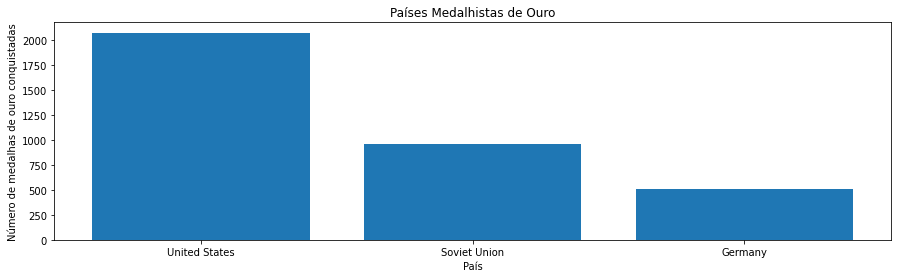

In [52]:
fig = plt.bar(x=Gold_medal_dados_plot.index, height=Gold_medal_dados_plot.values)
plt.title('Países Medalhistas de Ouro')
plt.xlabel('País')
plt.ylabel('Número de medalhas de ouro conquistadas')
plt.show()

Podemos ver os 3 primeiros países com o número máximo de medalhas de ouro conquistadas durante as olimpíadas. EUA lideram.

# PERGUNTA 2: Atletas femininas ganham mais medalhas do que seus pares masculinos?


In [57]:
refined_dados['Sex'].unique()
Gender_counts = refined_dados['Sex'].value_counts()
Gender_counts

M    139454
F     66711
Name: Sex, dtype: int64

In [58]:
Gender_counts = refined_dados[refined_dados['Medal'] != 'No'].groupby('Sex')['Medal'].count().sort_values(ascending=False)
Gender_counts

Sex
M    19831
F    10350
Name: Medal, dtype: int64

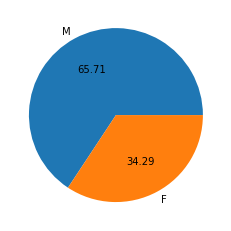

In [61]:
fig = plt.pie(Gender_counts, labels=Gender_counts.index, autopct='%.2f')


Os dados obtidos indicam que os Atletas Masculinos conquistaram mais medalhas do que as Atletas Femininas durante os Jogos Olímpicos.

#PERGUNTA 3: Quantas medalhas foram conquistadas pelo Paquistão?

In [62]:
#Isolando Atletas do paquistão
refined_dados[refined_dados['Team'].astype(str).str.contains('Pakistan')]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
233,111,Aqarab Abbas,M,22.0,190.0,88.0,Pakistan,PAK,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's Hammer Throw,No
237,115,Ghulam Abbas,M,24.0,181.0,74.0,Pakistan,PAK,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 400 metres Hurdles,No
245,121,Muhammad Abbas,M,23.0,168.0,55.0,Pakistan,PAK,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Giant Slalom,No
247,123,Sohail Abbas,M,25.0,178.0,80.0,Pakistan,PAK,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,No
248,123,Sohail Abbas,M,29.0,178.0,80.0,Pakistan,PAK,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267551,133849,Tahir Zaman,M,23.0,170.0,65.0,Pakistan,PAK,1992 Summer,1992,Summer,Barcelona,Hockey,Hockey Men's Hockey,Bronze
267552,133849,Tahir Zaman,M,27.0,170.0,65.0,Pakistan,PAK,1996 Summer,1996,Summer,Atlanta,Hockey,Hockey Men's Hockey,No
269610,134907,Qamar Zia,M,22.0,168.0,61.0,Pakistan,PAK,1976 Summer,1976,Summer,Montreal,Hockey,Hockey Men's Hockey,Bronze
269611,134908,Qasim Zia,M,22.0,174.0,71.0,Pakistan,PAK,1984 Summer,1984,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold


In [64]:
Pakistani_participants = refined_dados[refined_dados['Team'].astype(str).str.contains('Pakistan')]
Pakistani_participants

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
233,111,Aqarab Abbas,M,22.0,190.0,88.0,Pakistan,PAK,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's Hammer Throw,No
237,115,Ghulam Abbas,M,24.0,181.0,74.0,Pakistan,PAK,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 400 metres Hurdles,No
245,121,Muhammad Abbas,M,23.0,168.0,55.0,Pakistan,PAK,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Giant Slalom,No
247,123,Sohail Abbas,M,25.0,178.0,80.0,Pakistan,PAK,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,No
248,123,Sohail Abbas,M,29.0,178.0,80.0,Pakistan,PAK,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267551,133849,Tahir Zaman,M,23.0,170.0,65.0,Pakistan,PAK,1992 Summer,1992,Summer,Barcelona,Hockey,Hockey Men's Hockey,Bronze
267552,133849,Tahir Zaman,M,27.0,170.0,65.0,Pakistan,PAK,1996 Summer,1996,Summer,Atlanta,Hockey,Hockey Men's Hockey,No
269610,134907,Qamar Zia,M,22.0,168.0,61.0,Pakistan,PAK,1976 Summer,1976,Summer,Montreal,Hockey,Hockey Men's Hockey,Bronze
269611,134908,Qasim Zia,M,22.0,174.0,71.0,Pakistan,PAK,1984 Summer,1984,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold


In [65]:
Pak_medal_counts = Pakistani_participants[Pakistani_participants['Medal'] != 'No'].groupby('Team')['Medal'].count().sort_values(ascending=False)
Pak_medal_counts


Team
Pakistan    107
Name: Medal, dtype: int64

In [66]:
Pak_medal_counts = Pakistani_participants['Medal'].value_counts().drop('No')
Pak_medal_counts

Gold      42
Silver    41
Bronze    24
Name: Medal, dtype: int64

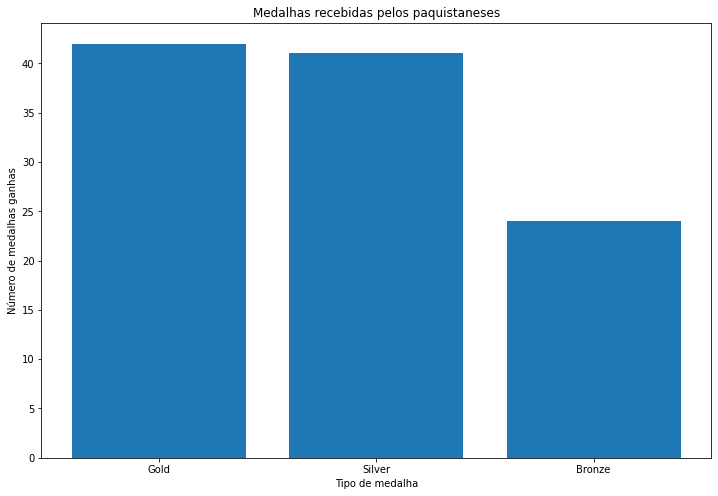

In [68]:
fig = plt.bar(x=Pak_medal_counts.index, height=Pak_medal_counts.values)

plt.title('Medalhas recebidas pelos paquistaneses')
plt.xlabel('Tipo de medalha')
plt.ylabel('Número de medalhas ganhas')
plt.show()
plt.rcParams['figure.figsize'] = [12, 8]

#PERGUNTA 4: Qual é a idade média dos participantes de diferentes equipes com menos de 22 anos que participam das Olimpíadas.


In [69]:
average_age = refined_dados.groupby('NOC')['Age'].mean().sort_values().head(12)
average_age

NOC
MHL    19.461538
UAR    20.000000
YEM    20.400000
MDV    20.571429
NFL    21.000000
LAO    21.470588
TUV    21.500000
COM    21.600000
KIR    21.636364
SAA    21.666667
SUR    21.750000
BRU    21.888889
Name: Age, dtype: float64

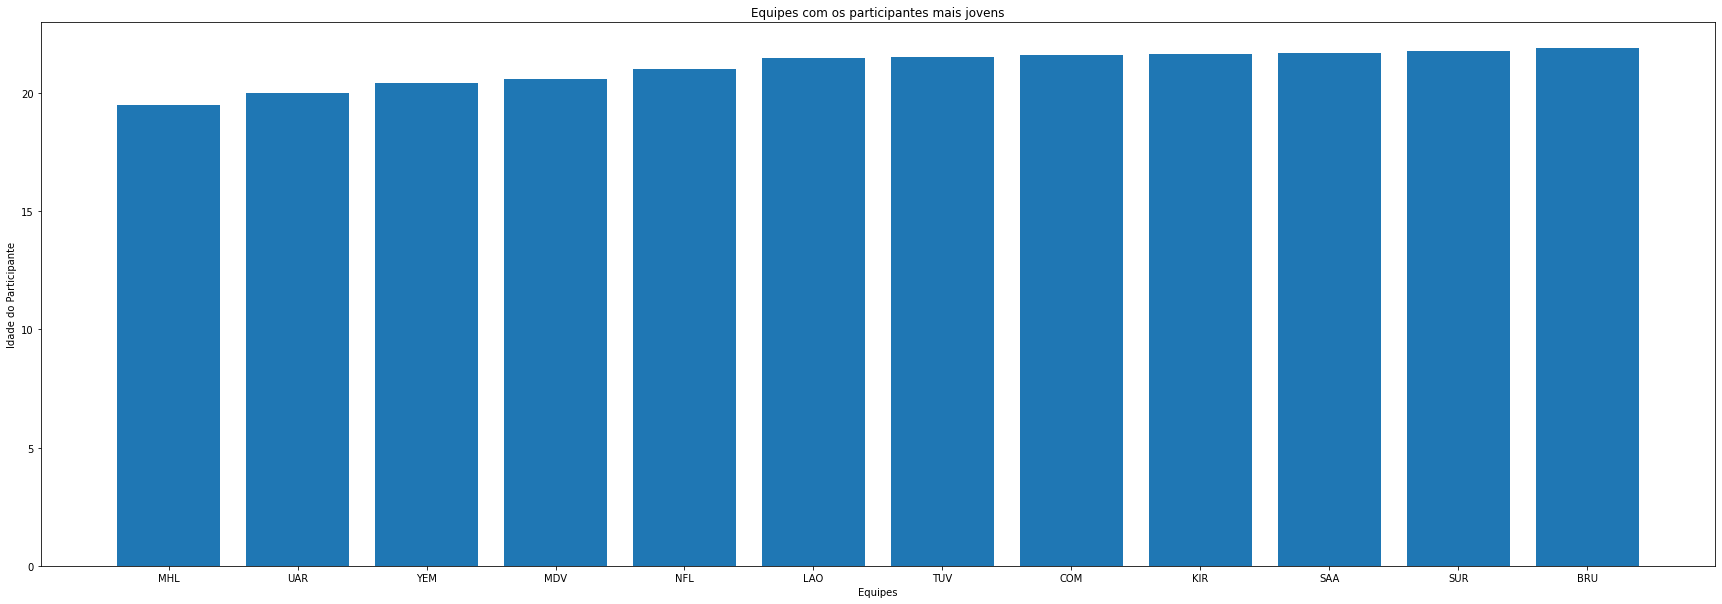

In [78]:
fig = plt.bar(x=average_age.index, height=average_age.values)
plt.title('Equipes com os participantes mais jovens')
plt.xlabel('Equipes')
plt.ylabel('Idade do Participante')
plt.show()
plt.rcParams['figure.figsize'] = [30, 10]

#Questão 5: Qual temporada tem o maior número de participantes entre verão e inverno?

In [71]:
refined_dados['Season'].unique()


array(['Summer', 'Winter'], dtype=object)

In [72]:
Season_counts = refined_dados['Season'].value_counts()
Season_counts

Summer    166706
Winter     39459
Name: Season, dtype: int64

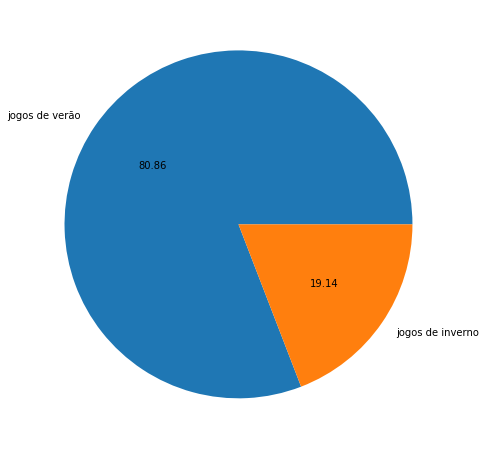

In [76]:
fig = plt.pie(Season_counts, labels=['jogos de verão','jogos de inverno'], autopct='%.2f')
